## Astro 304 "Galaxies"

In [1]:
import numpy as np

# import pyplot and set some parameters to make plots prettier
import matplotlib.pyplot as plt
from code.plot_utils import plot_pretty
plot_pretty()

# setup notebook for inline figures
%matplotlib inline

### Orbits in the central potentials

#### Reference for reading: Binney and Tremain "Galactic dynamics", S 3.1, p. 143 (+ Appendix D.3)

Consider motion of particle in a *central field*, where force depends only on the distance to the origin of the field, $\vec{r}=r\vec{e}_r$, where $\vec{e}_r$ is a unit vector along $\vec{r}$. The force acting on a particle in such field has only one component - along $\vec{r}$.

Cross-product of any vectors is zero, if the angle between them in the plane formed by them is $0$ or $\pi$. Thus, in the central field,

$$\frac{d\vec{L}}{dt}=\frac{d}{dt}\left(\vec{r}\times\frac{d\vec{r}}{dt}\right)=\frac{d\vec{r}}{dt}\times \frac{d\vec{r}}{dt} + \vec{r}\times\frac{d^2\vec{r}}{dt^2}=r\vec{e}_r\times g(r)\vec{e}_r=0.$$
The angular momentum (per unit mass) vector $\vec{L}=\vec{r}\times \vec{v}$ is thus conserved. This vector is pointing in the direction perpendicular to the plane defined by $\vec{r}$ and $\vec{v}$ and its conservation means that *particle orbit in the central field is confined to a fixed plane.*

This means that orbit can be described using 2 coordinates instead of 3. We will use distance to the force center, $r$, and angle, $\psi$, formed by $\vec{r}$ relative to a reference direction, $\psi_0$, as such coordinates.

### Equation of motion in the orbital plane

<a href="http://www.feynmanlectures.caltech.edu/II_19.html">Principle of least action</a> in mechanics states that particles move along trajectory, for which action $\mathcal{S}=\int_{t_0}^{t_1}\mathcal{L}dt$ is stationary to first order: $\delta\mathcal{S}=0$. Here $\mathcal{L}(t,\vec{q},\dot{\vec{q}})$ is the Lagrangian per unit mass. The principle gives rise to the <a href="http://farside.ph.utexas.edu/teaching/336k/Newtonhtml/node77.html">generalized Lagrange equations</a>:
$$\frac{d}{dt}\left(\frac{\partial\mathcal{L}}{\partial\dot{q}_j}\right)-\frac{\partial\mathcal{L}}{\partial q_j}=0,$$
where $j$ indicates j-th component of generalized velocity, $\dot{\vec{q}}$, and coordinate, $\vec{q}$.

For a particle in orbital plane in the central field: $\mathcal{L}=\frac{1}{2}[\dot{r}^2+(r\dot{\psi})^2]-\Phi(r)$, where $\Phi(r)$ is the potential corresponding to the central force: $g(r)=-\partial\Phi/\partial r$. So that Lagrangian equations of motions are:
<br>

$$\frac{d}{dt}\left(\frac{\partial\mathcal{L}}{\partial \dot{r}}\right)-\frac{\partial \mathcal{L}}{\partial r}=0.$$
$$\frac{d}{dt}\left(\frac{\partial\mathcal{L}}{\partial \dot{\psi}}\right)-\frac{\partial \mathcal{L}}{\partial \psi}=0.$$

The second equation gives: 
$$\frac{d}{dt}\left(r^2\dot{\psi}\right)=0,$$

which reflects conservation of angular momentum, $L=r^2\dot{\psi}=\rm const$.

### Effective potential

The first Lagrange equation gives

$$\ddot{r}-r\dot{\psi}^2+\frac{\partial\Phi}{\partial r}=0.$$

Given that $L=r^2\dot{\psi}=\rm const$, this can be re-written as:

$$\ddot{r}=-\frac{\partial}{\partial r}\left[\frac{L}{2r^2}+\Phi(r)\right]=-\frac{\partial\,\Phi_{\rm eff}(r)}{\partial r}.$$

Here $\Phi_{\rm eff}$ is the *effective potential*: $\Phi_{\rm eff}(r)\equiv L/(2r^2)+\Phi(r)$. Physically, it accounts for the centrifugal force due to angular momentum of the particle motion, which counteracts the central force. Here is how it looks like for a star orbiting around the center of the Milky Way. 

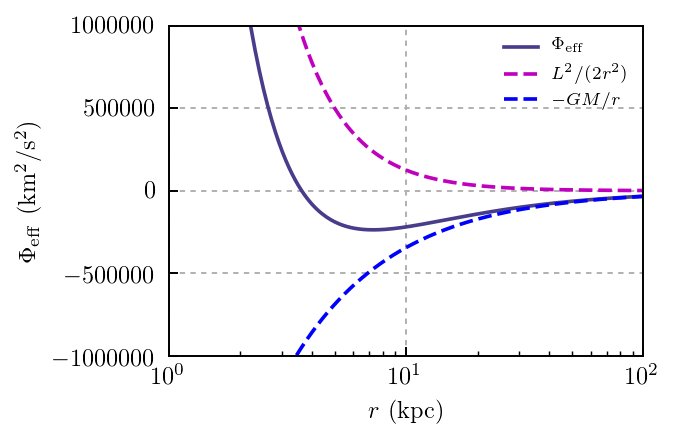

In [8]:
rp = np.linspace(0.01,100.,1000)

# rough mass of the Milky Way at r = 100 kpc
Mdisk = 8.e11; 
# particle parameters (arbitrary but realistic)
kpc = 3.0856e21
rp0 = 100.; v0 = 50.; Lp = v0*rp0

# compute Phi eff in (km^2/s^2); 4.30131e-6 = G*Msun/kpc in units of km^2/s^2
Phi_eff = 0.5*Lp**2/rp**2 - Mdisk/rp * 4.30131e-6


plt.figure(figsize=(3.5,2.5))
plt.xlim(1,100.); plt.ylim(-1.e6,1.e6)
plt.xscale('log')
plt.xlabel(r'$r\rm\ (kpc)$'); plt.ylabel(r'$\Phi_{\rm eff}\ \mathrm{(km^2/s^2)}$')
plt.plot(rp, Phi_eff, c='darkslateblue', label=r'$\Phi_{\rm eff}$')
plt.plot(rp, 0.5*Lp**2/rp**2, '--', c='m', label=r'$L^2/(2r^2)$')
plt.plot(rp, -Mdisk/rp * 4.30131e-6, '--', c='b', label=r'$-GM/r$')
plt.legend(loc='upper right', frameon=False, fontsize=7)
#plt.savefig('fig/phi_eff.png', bbox_inches='tight')
plt.grid(linestyle='dotted')
plt.show()

We can see that effective potential looks like gravitational potential at large $r$, but increases steeply at small $r$. This steep increase is kind of a "wall" for particle set by the centrifugal force. For a given angular momentum $L$, there is a radius where centrifugal potential $L^2/(2r^2)$ matches gravitational potential $\Phi$. At smaller $r$ the centrifugal potential dominates and prevents motion of particles to smaller $r$. For a particle with $L>0$ there will thus be the smallest $r$ it can reach within a given gravitational potential. 

### Solution of the equation of motion in the central field

The first Lagrange equation can be rewritten using conservation of $L=r^2\dot{\psi}=\rm const$ to change variable from $dt$ to $d\psi=L dt/r^2$. This substitution and in the first Lagrange equation gives:
$$\frac{L^2}{r^2}\frac{d}{d\psi}\left(\frac{1}{r^2}\frac{dr}{d\psi}\right)-\frac{L^2}{r^3}=-\frac{\partial\Phi}{\partial r}.$$

Further substituting $r$ for $u\equiv 1/r$, gives:

$$\frac{d^2 u}{d\psi^2} + u=-\frac{1}{L^2}\frac{\partial\Phi}{\partial u}.$$

General solution of this equation for motion around a point mass, $\Phi=-GM/r=-GMu$, has the following form:
$$u(\psi)=C\cos(\psi-\psi_0)+\frac{GM}{L^2},$$
where $C>0$ and $\psi_0$ are arbitrary constants. $C$ is related to orbit *eccentricity* $e$ and *semi-major axis* $a$:

$$e=\frac{CL^2}{GM}\ \ \ \  a\equiv\frac{L^2}{GM(1-e^2)}.$$

The solution can then be rewritten for $r(\psi)=1/u$ as

$$r=\frac{a(1-e^2)}{1+e\cos(\psi-\psi_0)}.$$

Note that if $e<1$, $r$ oscillates within a fixed range as $\cos(\psi-\psi_0)$ changes between $-1$ and $1$ for varying $\psi$. However, when $e\geq 1$, $r$ can go to infinity. Thus, $e\geq 1$ corresponds to *unbound* orbits, while $e<1$ orbits are *bound*.

### Orbit pericenter, apocenter, r as a function of orbit anomaly

Bound orbits have a fixed range within which $r$ varies, *apocenter*:
$$r_{\rm apo}=\frac{a(1-e^2)}{1-e}=a(1+e)$$
and *pericenter:
$$r_{\rm peri}=\frac{a(1-e^2)}{1+e}=a(1-e).$$

If you think about these expressions a bit, it becomes clear that solution of the equation of motion can also be written as
<br>

$$r=a(1-e\cos\eta),$$

where $\eta$ is called the *eccentric anomaly* to distinguish it from the *true anomaly* $\psi-\psi_0$. The two are related, of course:
$$\sqrt{1-e}\,\tan\frac{1}{2}(\psi-\psi_0)=\sqrt{1+e}\,\tan\frac{1}{2}\eta.$$


### Orbit period

Note that $t-t_0=\int_{t_0}^tdt$ and $\dot{\psi}dt=d\psi$. Assuming $t_0$ corresponds to the pericenter passage ($\eta=0$):

$$t=\int_{\psi_0}^{\psi}\frac{d\psi}{\dot{\psi}}=\int\frac{r^2}{L}d\psi=\frac{a^2}{L}\int\limits^\eta_0d\eta\frac{d\psi}{d\eta}(1-e\cos\eta)^2.$$

$d\psi/d\eta$ can be obtained from the relation of $\psi$ and $\eta$ above and the integral gives: 
$$t=\frac{a^2}{L}\sqrt{1-e^2}(\eta - e\sin\eta).$$
$\eta=\pi$ is the time of the apocenter passage, so $t$ for $\eta=\pi$ corresponds the time between pericenter and apocenter. Orbit period will be twice that:

$$T_r=2\pi\frac{a^2}{L}\sqrt{1-e^2}=2\pi\sqrt{\frac{a^3}{GM}},$$
where expression for $a$ above was used to get the second equality - *the Kepler's 3rd law*.

Note that from the equations above, it is clear that $\eta$ and $\psi-\psi_0$ change by $2\pi$ in one $T_r$ for an orbit around a point mass. 

Note that when when two bodies orbit each other, the above equations stand. The two bodies can be viewed as orbiting a point mass at their common center of mass. The mass $M$ in the equation above in this case represents the sum of the masses of the bodies, $M=M_1+M_2$. 